<a href="https://colab.research.google.com/github/malet-ds/GlobalAIHubDLCourse/blob/main/project/Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Image Classification

Hola !

Objective of this project is to implement the following models for the CIFAR100 image classification dataset.

### Importing packages 

In [2]:
# Import neccessary packages here
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

### Load data

In [ ]:
# image data
img_rows, img_cols, channels = 32, 32, 3
num_classes = 20

# Read images using built-in functions 
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape = (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

# Perform preprocessing (if any)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 validation samples
10000 test samples


###  Training parameters

In [ ]:
# Mention the training parameters such as epochs, learning rate, number of samples etc.
batch_size = 32
epochs = 10


## Training CNN for CIFAR100

In [ ]:
# Design the model architecture here
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

### Compile

In [ ]:
# Compile the model architecture here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


### Training

In [ ]:
# Train the transfer learning model here   // NOTE: I am not doing transfer learning here.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))


Epoch 1/10
1250/1250 [==============================] - 53s 42ms/step - loss: 3.0146 - accuracy: 0.0509 - val_loss: 2.9992 - val_accuracy: 0.0593
Epoch 2/10
1250/1250 [==============================] - 52s 41ms/step - loss: 3.0035 - accuracy: 0.0512 - val_loss: 2.9948 - val_accuracy: 0.0592
Epoch 3/10
1250/1250 [==============================] - 57s 46ms/step - loss: 2.9988 - accuracy: 0.0504 - val_loss: 2.9916 - val_accuracy: 0.0611
Epoch 4/10
1250/1250 [==============================] - 52s 41ms/step - loss: 2.9950 - accuracy: 0.0565 - val_loss: 2.9892 - val_accuracy: 0.0643
Epoch 5/10
1250/1250 [==============================] - 52s 41ms/step - loss: 2.9938 - accuracy: 0.0558 - val_loss: 2.9871 - val_accuracy: 0.0707
Epoch 6/10
1250/1250 [==============================] - 52s 41ms/step - loss: 2.9904 - accuracy: 0.0597 - val_loss: 2.9850 - val_accuracy: 0.0790
Epoch 7/10
1250/1250 [==============================] - 52s 42ms/step - loss: 2.9899 - accuracy: 0.0608 - val_loss: 2.9829 -

### Testing

In [ ]:
# Test the transfer learning model with testing set      //   NOTE: I am not doing transfer learning here
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 2.9761674404144287
Test accuracy: 0.09220000356435776


### Save

In [ ]:
# Save the model to disk

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


### Inference

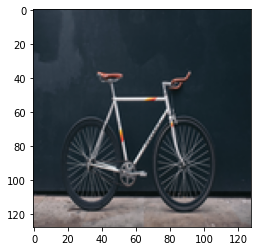

Predicted Class:  vehicles 2


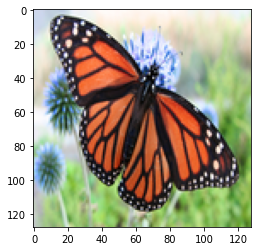

Predicted Class:  household electrical devices


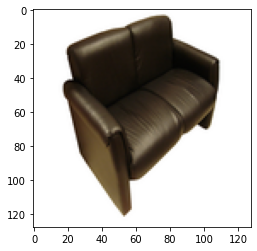

Predicted Class:  vehicles 2


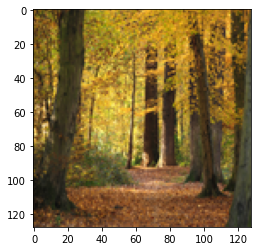

Predicted Class:  fruit and vegetables


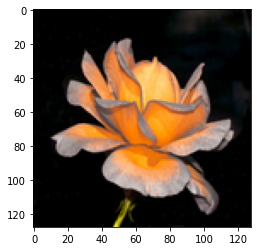

Predicted Class:  medium-sized mammals


In [ ]:
# Download random fashion images from internet and process them to give as input to the model   
#### NOTE: I did not train using the fashion dataset, so I downloaded images consistent with the dataset used for training
## I downloaded 5 images and resized them to be 32x32
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image

# this order of labels assumes that the documentation keeps the same order than the dataset
labels = ['aquatic mammals','fish','flowers','food','fruit and vegetables','household electrical devices','household furniture','insects',
          'large carnivores','large man-made outdoor things','large natural outdoor scenes','large omnivores and herbivores','medium-sized mammals',
          'non-insect invertebrates','people','reptiles','small mammals','trees','vehicles 1','vehicles 2']

im_size = 128

images = ['pictures/bicycle.jpg','pictures/butterfly.jpg','pictures/couch.jpg','pictures/forest.jpg','pictures/rose.jpg'] 

for img in images:
    image = Image.open(img)
    image = image.resize((im_size,im_size), Image.ANTIALIAS)
    data = asarray(image)    
    plt.imshow(data/255)
    plt.show()
    # Perform preprocessing
    data = data.reshape(1,data.shape[0],data.shape[1],data.shape[2])
    data = data.astype('float32')
    data /= 255
    # Predict label of the downloaded images using trained model
    prediction = model.predict(data)
    predicted_class = np.where(prediction[0] == np.max(prediction[0]))[0][0]
    #print('Prediction Scores: \n', prediction[0])
    print('Predicted Class: ', labels[predicted_class])


### CONCLUSION: NOT THE BEST CLASSIFIER I HAVE SEEN

### Further Fun



*   Experiment with different model architectures
*   Play with different parameters such as convolution size, pooling, padding, striding, epochs, dropout etc.
*   Train a Dense Neural Network as baseline and compare the performance



#### USING A PRE-TRAINED MODEL

In [9]:
# loading the vgg16 model
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

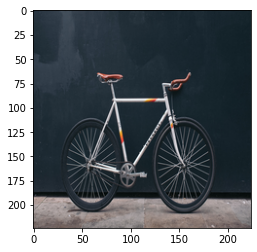

('n02835271', 'bicycle-built-for-two', 0.24156842)


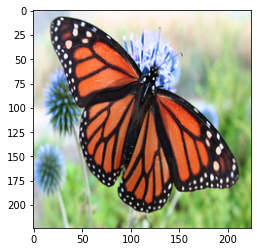

('n02279972', 'monarch', 0.9999449)


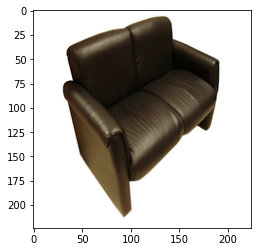

('n02791124', 'barber_chair', 0.6236955)


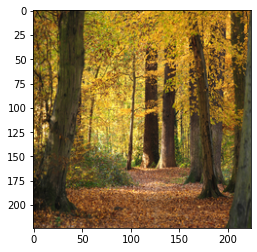

('n03743016', 'megalith', 0.34769484)


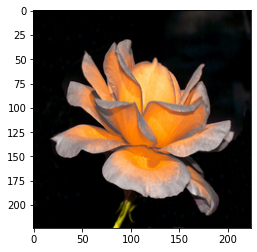

('n12985857', 'coral_fungus', 0.24847731)


In [30]:
# prepare images and perform predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image

im_size = 224

images = ['pictures/bicycle.jpg','pictures/butterfly.jpg','pictures/couch.jpg','pictures/forest.jpg','pictures/rose.jpg'] 

for img in images:
    image = Image.open(img)
    image = image.resize((im_size,im_size), Image.ANTIALIAS)
    data = asarray(image)    
    plt.imshow(data/255)
    plt.show()
    # Perform preprocessing
    image = asarray(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    # Predict label of the downloaded images using trained model
    pred = model.predict(image)
    label = decode_predictions(pred)
    label = label[0][0]
    print(label)



### MUCH BETTER, THOUGH NOT SO GREAT